In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings('ignore')


In [2]:
from google.colab import files
uploaded = files.upload()

Saving SalaryData_Train.csv to SalaryData_Train.csv


In [3]:
saltr = pd.read_csv('SalaryData_Train.csv')
saltr

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
from google.colab import files
uploaded = files.upload()

Saving SalaryData_Test.csv to SalaryData_Test.csv


In [5]:
salts = pd.read_csv('SalaryData_Test.csv')
salts

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [6]:
saltr.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [7]:
salts.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [8]:
del saltr['education']

In [9]:
del saltr['relationship']

In [11]:
saltr.columns

Index(['age', 'workclass', 'educationno', 'maritalstatus', 'occupation',
       'race', 'sex', 'capitalgain', 'capitalloss', 'hoursperweek', 'native',
       'Salary'],
      dtype='object')

In [12]:
del salts['relationship']
del salts['education']

In [13]:
salts.columns

Index(['age', 'workclass', 'educationno', 'maritalstatus', 'occupation',
       'race', 'sex', 'capitalgain', 'capitalloss', 'hoursperweek', 'native',
       'Salary'],
      dtype='object')

In [14]:
saltr['workclass']=encoder.fit_transform(saltr['workclass'])
saltr['maritalstatus']=encoder.fit_transform(saltr['maritalstatus'])
saltr['occupation']=encoder.fit_transform(saltr['occupation'])
saltr['race']=encoder.fit_transform(saltr['race'])
saltr['sex']=encoder.fit_transform(saltr['sex'])
saltr['native']=encoder.fit_transform(saltr['native'])
saltr

,age,workclass,educationno,maritalstatus,occupation,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,13,4,0,4,1,2174,0,40,37,<=50K
1,50,4,13,2,3,4,1,0,0,13,37,<=50K
2,38,2,9,0,5,4,1,0,0,40,37,<=50K
3,53,2,7,2,5,2,1,0,0,40,37,<=50K
4,28,2,13,2,9,2,0,0,0,40,4,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,12,2,12,4,0,0,0,38,37,<=50K
30157,40,2,9,2,6,4,1,0,0,40,37,>50K
30158,58,2,9,6,0,4,0,0,0,40,37,<=50K
30159,22,2,9,4,0,4,1,0,0,20,37,<=50K


In [15]:
salts['workclass']=encoder.fit_transform(salts['workclass'])
salts['maritalstatus']=encoder.fit_transform(salts['maritalstatus'])
salts['occupation']=encoder.fit_transform(salts['occupation'])
salts['race']=encoder.fit_transform(salts['race'])
salts['sex']=encoder.fit_transform(salts['sex'])
salts['native']=encoder.fit_transform(salts['native'])
salts

,age,workclass,educationno,maritalstatus,occupation,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,7,4,6,2,1,0,0,40,37,<=50K
1,38,2,9,2,4,4,1,0,0,50,37,<=50K
2,28,1,12,2,10,4,1,0,0,40,37,>50K
3,44,2,10,2,6,2,1,7688,0,40,37,>50K
4,34,2,6,4,7,4,1,0,0,30,37,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,13,4,9,4,1,0,0,40,37,<=50K
15056,39,2,13,0,9,4,0,0,0,36,37,<=50K
15057,38,2,13,2,9,4,1,0,0,50,37,<=50K
15058,44,2,13,0,0,1,1,5455,0,40,37,<=50K


In [16]:
saltr.info(), salts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  int64 
 2   educationno    30161 non-null  int64 
 3   maritalstatus  30161 non-null  int64 
 4   occupation     30161 non-null  int64 
 5   race           30161 non-null  int64 
 6   sex            30161 non-null  int64 
 7   capitalgain    30161 non-null  int64 
 8   capitalloss    30161 non-null  int64 
 9   hoursperweek   30161 non-null  int64 
 10  native         30161 non-null  int64 
 11  Salary         30161 non-null  object
dtypes: int64(11), object(1)
memory usage: 2.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 


(None, None)

In [17]:
saltr.shape, salts.shape 

((30161, 12), (15060, 12))

In [18]:
saltr.describe(), salts.describe()

(                age    workclass   educationno  maritalstatus    occupation  \
 count  30161.000000  30161.00000  30161.000000   30161.000000  30161.000000   
 mean      38.438115      2.19933     10.121316       2.580087      5.959849   
 std       13.134830      0.95394      2.550037       1.498018      4.029633   
 min       17.000000      0.00000      1.000000       0.000000      0.000000   
 25%       28.000000      2.00000      9.000000       2.000000      2.000000   
 50%       37.000000      2.00000     10.000000       2.000000      6.000000   
 75%       47.000000      2.00000     13.000000       4.000000      9.000000   
 max       90.000000      6.00000     16.000000       6.000000     13.000000   
 
                race           sex   capitalgain   capitalloss  hoursperweek  \
 count  30161.000000  30161.000000  30161.000000  30161.000000  30161.000000   
 mean       3.678592      0.675707   1092.044064     88.302311     40.931269   
 std        0.834721      0.468118   7

In [19]:
saltr.isnull().sum(), salts.isnull().sum()

(age              0
 workclass        0
 educationno      0
 maritalstatus    0
 occupation       0
 race             0
 sex              0
 capitalgain      0
 capitalloss      0
 hoursperweek     0
 native           0
 Salary           0
 dtype: int64, age              0
 workclass        0
 educationno      0
 maritalstatus    0
 occupation       0
 race             0
 sex              0
 capitalgain      0
 capitalloss      0
 hoursperweek     0
 native           0
 Salary           0
 dtype: int64)

In [21]:
saltr.corr()

,age,workclass,educationno,maritalstatus,occupation,race,sex,capitalgain,capitalloss,hoursperweek,native
age,1.000000,0.080537,0.043525,-0.276363,-0.005682,0.023380,0.081972,0.080152,0.060278,0.101598,-0.001548
workclass,0.080537,1.000000,0.037833,-0.034235,0.015572,0.044734,0.074966,0.035349,0.007244,0.050723,0.007598
educationno,0.043525,0.037833,1.000000,-0.063419,0.087717,0.032805,0.006155,0.124416,0.079691,0.152522,0.092625
maritalstatus,-0.276363,-0.034235,-0.063419,1.000000,0.022655,-0.068641,-0.119774,-0.042414,-0.035385,-0.189004,-0.026057
occupation,-0.005682,0.015572,0.087717,0.022655,1.000000,0.000717,0.062316,0.022162,0.014612,0.018365,-0.003298
race,0.023380,0.044734,0.032805,-0.068641,0.000717,1.000000,0.089207,0.014355,0.023461,0.048533,0.126507
sex,0.081972,0.074966,0.006155,-0.119774,0.062316,0.089207,1.000000,0.048809,0.047285,0.231272,0.000063
capitalgain,0.080152,0.035349,0.124416,-0.042414,0.022162,0.014355,0.048809,1.000000,-0.032218,0.080431,0.008513
capitalloss,0.060278,0.007244,0.079691,-0.035385,0.014612,0.023461,0.047285,-0.032218,1.000000,0.052454,0.010193
hoursperweek,0.101598,0.050723,0.152522,-0.189004,0.018365,0.048533,0.231272,0.080431,0.052454,1.000000,0.008429


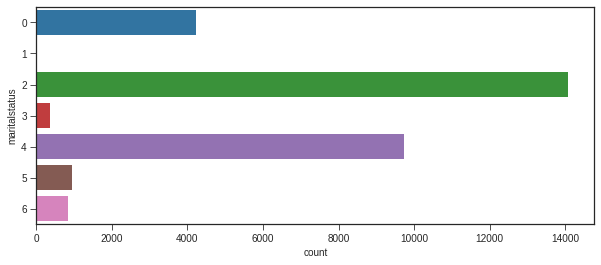

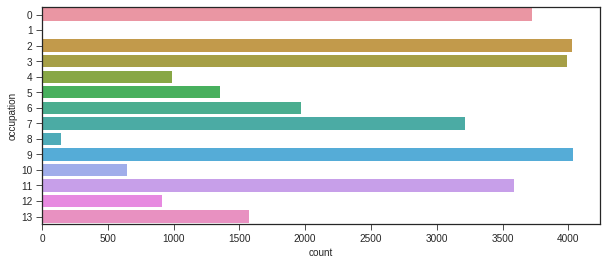

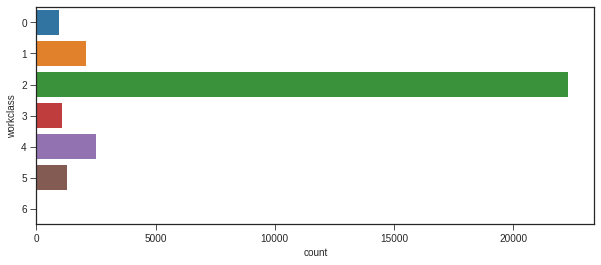

In [20]:
plt.figure(figsize=(10,4))
plt.style.use('seaborn-ticks')
sns.countplot(y="maritalstatus", data=saltr)

plt.style.use('seaborn-ticks')
plt.figure(figsize=(10,4)) 
sns.countplot(y="occupation", data=saltr)

plt.style.use('seaborn-ticks')
plt.figure(figsize=(10,4)) 
sns.countplot(y="workclass", data=saltr)

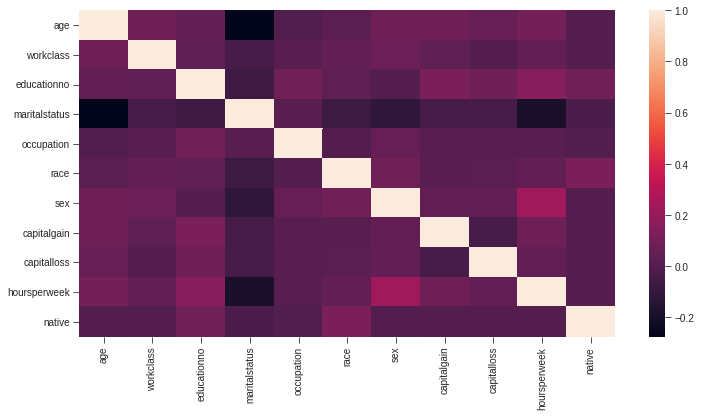

In [22]:
plt.figure(figsize=(12,6))
sns.heatmap(saltr.corr())
plt.show()

In [23]:
from matplotlib import style

In [24]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


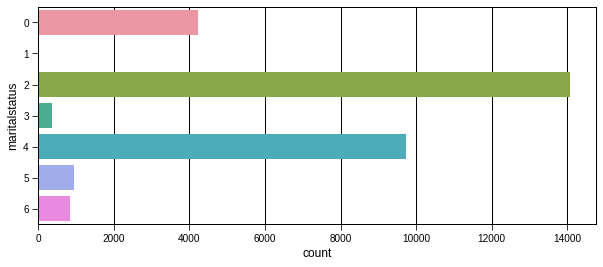

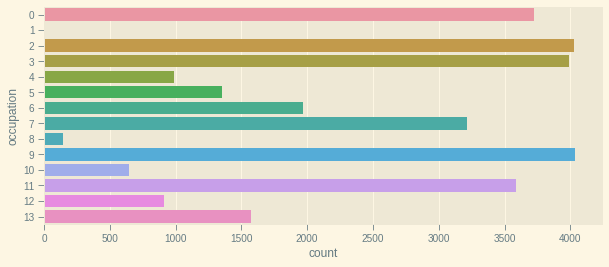

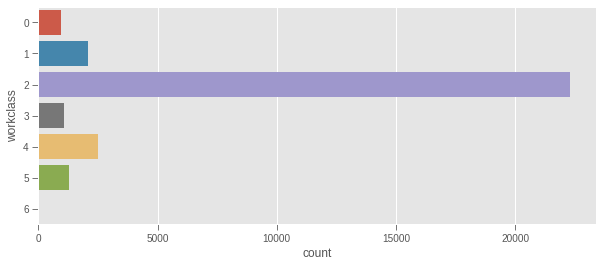

In [29]:
plt.figure(figsize=(10,4))
plt.style.use('grayscale')
sns.countplot(y="maritalstatus", data=saltr)

plt.style.use('Solarize_Light2')
plt.figure(figsize=(10,4)) 
sns.countplot(y="occupation", data=saltr)

plt.style.use('ggplot')
plt.figure(figsize=(10,4)) 
sns.countplot(y="workclass", data=saltr)

MODEL


In [30]:
X_train=saltr.iloc[:,:-1]
Y_train=saltr.iloc[:,-1]

In [31]:
X_test=salts.iloc[:,:-1]
Y_test=salts.iloc[:,-1]

In [32]:
X_train, Y_train

(       age  workclass  educationno  maritalstatus  occupation  race  sex  \
 0       39          5           13              4           0     4    1   
 1       50          4           13              2           3     4    1   
 2       38          2            9              0           5     4    1   
 3       53          2            7              2           5     2    1   
 4       28          2           13              2           9     2    0   
 ...    ...        ...          ...            ...         ...   ...  ...   
 30156   27          2           12              2          12     4    0   
 30157   40          2            9              2           6     4    1   
 30158   58          2            9              6           0     4    0   
 30159   22          2            9              4           0     4    1   
 30160   52          3            9              2           3     4    0   
 
        capitalgain  capitalloss  hoursperweek  native  
 0             21

In [38]:
Y_train.value_counts()

 <=50K    22653
 >50K      7508
Name: Salary, dtype: int64

In [39]:
Y_test.value_counts()

 <=50K    11360
 >50K      3700
Name: Salary, dtype: int64

In [34]:
gnb=GaussianNB()
gnb.fit(X_train,Y_train)

GaussianNB()

In [35]:
Y_test_pred=gnb.predict(X_test)
Y_test

0         <=50K
1         <=50K
2          >50K
3          >50K
4         <=50K
          ...  
15055     <=50K
15056     <=50K
15057     <=50K
15058     <=50K
15059      >50K
Name: Salary, Length: 15060, dtype: object

In [36]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(Y_test,Y_test_pred)

array([[10778,   582],
       [ 2552,  1148]])

In [40]:
accuracy_score(Y_test,Y_test_pred)

0.7918990703851262